In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/100-bird-species/BIRDS-450-(200 X 200)-99.28.h5
/kaggle/input/100-bird-species/info.txt
/kaggle/input/100-bird-species/birds.csv
/kaggle/input/100-bird-species/valid/DALMATIAN PELICAN/5.jpg
/kaggle/input/100-bird-species/valid/DALMATIAN PELICAN/1.jpg
/kaggle/input/100-bird-species/valid/DALMATIAN PELICAN/4.jpg
/kaggle/input/100-bird-species/valid/DALMATIAN PELICAN/3.jpg
/kaggle/input/100-bird-species/valid/DALMATIAN PELICAN/2.jpg
/kaggle/input/100-bird-species/valid/WATTLED CURASSOW/5.jpg
/kaggle/input/100-bird-species/valid/WATTLED CURASSOW/1.jpg
/kaggle/input/100-bird-species/valid/WATTLED CURASSOW/4.jpg
/kaggle/input/100-bird-species/valid/WATTLED CURASSOW/3.jpg
/kaggle/input/100-bird-species/valid/WATTLED CURASSOW/2.jpg
/kaggle/input/100-bird-species/valid/AMERICAN WIGEON/5.jpg
/kaggle/input/100-bird-species/valid/AMERICAN WIGEON/1.jpg
/kaggle/input/100-bird-species/valid/AMERICAN WIGEON/4.jpg
/kaggle/input/100-bird-species/valid/AMERICAN WIGEON/3.jpg
/kaggle/input/10

In [2]:
from PIL import Image

In [3]:
Image1 = Image.open("/kaggle/input/100-bird-species/test/ABYSSINIAN GROUND HORNBILL/2.jpg")

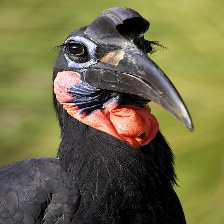

In [4]:
Image1

In [5]:
import tensorflow as tf

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/100-bird-species/train',
                                                       seed=123,shuffle=True,                                                    
                                                       image_size=(100,100),
                                                       batch_size=50)

Found 70626 files belonging to 450 classes.


2023-01-30 08:21:44.430755: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-30 08:21:44.431663: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-30 08:21:44.615227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-30 08:21:44.616077: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-30 08:21:44.616825: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [7]:
test_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/100-bird-species/test',
                                                       seed=123,shuffle=True,                                                    
                                                       image_size=(100,100),
                                                       batch_size=50)

Found 2250 files belonging to 450 classes.


In [8]:
class_labels = train_data.class_names
class_labels

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN WIGEON',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY STORM PETREL',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'ASIAN DOLLARD BIRD',
 'AUCKLAND SHAQ',
 'AUSTRAL CANASTERO',
 'AUSTRALASIAN FIGBIRD',
 'AVADAVAT',
 'AZARAS SPINETAIL',
 'AZURE BREASTED PITTA',
 'AZURE JAY',
 'AZURE TANAGER',
 'AZURE TIT',
 'BAIKAL TEAL',
 'BALD EAGLE',
 'BALD IBIS',
 'BALI

In [9]:
import matplotlib.pyplot as plt

2023-01-30 08:21:50.864696: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


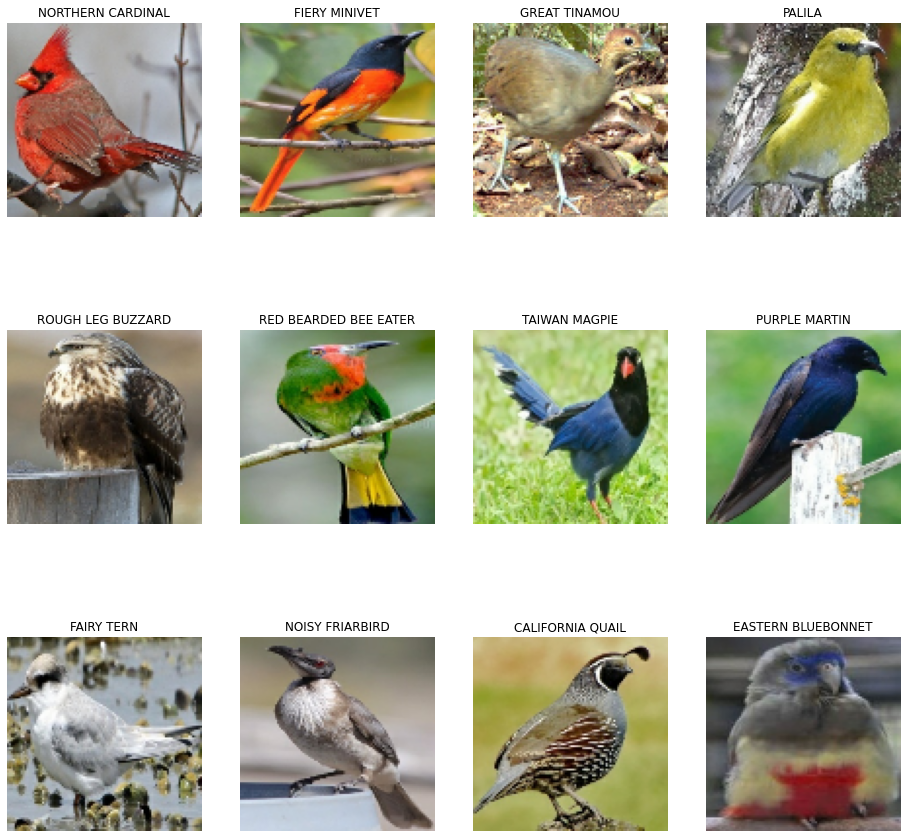

In [10]:
plt.figure(figsize=(16, 16))
for image_batch, labels_batch in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[labels_batch[i]])
        plt.axis("off")

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [13]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [14]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [16]:
model = Sequential()

tf.keras.layers.Rescaling(1.0/255)
model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(1800,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1800,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(900,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(450, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        1

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_data, epochs=50, verbose=1, validation_data=test_data,callbacks=[model_checkpoint_callback,es,reduce_lr])

Epoch 1/50


2023-01-30 08:21:57.315852: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1413/1413 [==============================] - 347s 236ms/step - loss: 5.4459 - accuracy: 0.0266 - val_loss: 4.4648 - val_accuracy: 0.1018
Epoch 2/50
1413/1413 [==============================] - 99s 69ms/step - loss: 4.4602 - accuracy: 0.0963 - val_loss: 3.6061 - val_accuracy: 0.2182
Epoch 3/50
1413/1413 [==============================] - 98s 69ms/step - loss: 3.8601 - accuracy: 0.1729 - val_loss: 3.3730 - val_accuracy: 0.2649
Epoch 4/50
1413/1413 [==============================] - 98s 69ms/step - loss: 3.4267 - accuracy: 0.2422 - val_loss: 2.5545 - val_accuracy: 0.4120
Epoch 5/50
1413/1413 [==============================] - 99s 70ms/step - loss: 3.1067 - accuracy: 0.2969 - val_loss: 2.2867 - val_accuracy: 0.4649
Epoch 6/50
1413/1413 [==============================] - 99s 70ms/step - loss: 2.8706 - accuracy: 0.3392 - val_loss: 2.1267 - val_accuracy: 0.4920
Epoch 7/50
1413/1413 [==============================] - 98s 69ms/step - loss: 2.6869 - accuracy: 0.3737 - val_loss: 1.8295 - val_accu